In [2]:
# Import Libraries 
import pandas as pd
import numpy as np
import pyodbc
import subprocess
import io
import os

import matplotlib as plt

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Read CSV file into pandas DataFrame
df = pd.read_csv('./Data/Customer-Level-Account Holder Detail Report -2603_Report2 (6).csv')


In [4]:
df.head(10)

,UNIQUE_ID_VALUE,UNIQUE_ID_NAME,CUSTOMER_NO,CIF_CREATION_DATE,FIRST_ACTIVE_ACCOUNT,BRANCH_CODE,BRANCH_NAME,AREA,REGION_DESC,CUSTOMER_RELATIONSHIP_DATE,...,MOBILE_APP_REGISTRATION_DATE,ACCOUNT_TYPE,ACCOUNT_STATUS,ACCOUNT_CLASS,ACCOUNT_CLASS_DESCRIPTION,CURRENCY,ELIGIBLE,ELIGIBLE_REMARKS,INET_ELIGIBLE,CUSTOMER_MTD_AVERAGE_ALL_ACTIVE_ELIGIBLE
0,3630238086142,CNIC,2712083,2016-04-27,250350002219,25,Noor Mahal Bahawalpur,Area Bahawalpur,Central Region-III,2016-04-27,...,2022-12-20,Current,Active,ACAA,Askari Asaan Current Account,PKR,Y,Active/Dormant Accounts,Y,89129.0
1,3840322692873,CNIC,418136,2012-06-09,240100039836,24,Abbottabad Branch,Area Office Abbotabad,North Region-III,2007-09-11,...,2013-02-27,Current,Active,CAI,Current Account,PKR,Y,Active/Dormant Accounts,Y,1042170.0
2,3120202475553,CNIC,435281,2012-06-16,250100034192,25,Noor Mahal Bahawalpur,Area Bahawalpur,Central Region-III,2005-05-05,...,NaN,Current,Active,CAI,Current Account,PKR,Y,Active/Dormant Accounts,Y,1688.0
3,1430107023311,CNIC,2242924,2012-02-11,280100218084,28,"G.H.Q Branch, Rawalpindi",Area Rawalpindi - III,North Region-I,2009-03-03,...,2016-08-03,Current,Active,CAI,Current Account,PKR,Y,Active/Dormant Accounts,Y,9689324.0
4,6110132362205,CNIC,4001836,2022-10-25,280630000788,28,"G.H.Q Branch, Rawalpindi",Area Rawalpindi - III,North Region-I,2022-10-25,...,2022-11-19,Current,Active,VPC_S2,Value Plus Current A/c Sub Br 2,PKR,Y,Active/Dormant Accounts,Y,17953.0
5,3520119536819,CNIC,2544918,2015-04-21,270100595649,27,"DHA 1 Branch, Lahore",Area Lahore-I,Central Region-I,2015-04-21,...,NaN,Current,Active,CAI,Current Account,PKR,Y,Active/Dormant Accounts,Y,3438.0
6,3740565428276,CNIC,3312773,2019-06-18,400320217255,40,"Chaklala Branch, Rawalpindi",Area Rawalpindi - II,North Region-I,2019-06-18,...,2021-06-24,Current,Active,VPC,Value Plus Current Account,PKR,Y,Active/Dormant Accounts,Y,1904515.0
7,3740504257304,CNIC,226934,2012-02-04,300210158467,30,"Peshawar Road, Rawalpindi",Area Rawalpindi - I,North Region-I,2011-09-30,...,2020-07-21,Current,Active,BBA,Basic Banking Account,PKR,Y,Active/Dormant Accounts,Y,2132.0
8,3650118824553,CNIC,290795,2012-03-03,441000205438,44,Satellite Town Branch,Area Rawalpindi - III,North Region-I,2003-11-15,...,NaN,Saving,Active,PLSA,Profit and Loss Saving Account,PKR,Y,Active/Dormant Accounts,Y,2298.0
9,3740505249487,CNIC,210329,2012-01-28,400210106958,40,"Chaklala Branch, Rawalpindi",Area Rawalpindi - II,North Region-I,2008-01-16,...,2012-08-25,Current,Active,BBA,Basic Banking Account,PKR,Y,Active/Dormant Accounts,Y,418459.0


In [7]:
df.shape

(1286984, 23)

In [6]:
# Get unique values in UNIQUE_ID_NAME column
unique_id_names = df['UNIQUE_ID_NAME'].unique()
print("Unique ID Names:")
for name in unique_id_names:
    print(f"- {name}")


Unique ID Names:
- CNIC
- Name Of Department
- Proprietor ID
- NTN
- NICOP
- FORM B
- POC
- Passport
- PORC
- Registration Number
- Frn Proprietor
- Relationship No
- EXCHCO
- ARC
- Individual Unique ID
- NTNK


In [8]:
print(df.columns)

Index(['UNIQUE_ID_VALUE', 'UNIQUE_ID_NAME', 'CUSTOMER_NO', 'CIF_CREATION_DATE',
       'FIRST_ACTIVE_ACCOUNT', 'BRANCH_CODE', 'BRANCH_NAME', 'AREA',
       'REGION_DESC', 'CUSTOMER_RELATIONSHIP_DATE', 'LAST_TRX_DATE', 'AGE',
       'AC_OPEN_DATE', 'MOBILE_APP_REGISTRATION_DATE', 'ACCOUNT_TYPE',
       'ACCOUNT_STATUS', 'ACCOUNT_CLASS', 'ACCOUNT_CLASS_DESCRIPTION',
       'CURRENCY', 'ELIGIBLE', 'ELIGIBLE_REMARKS', 'INET_ELIGIBLE',
       'CUSTOMER_MTD_AVERAGE_ALL_ACTIVE_ELIGIBLE'],
      dtype='object')


In [9]:
# Convert both date columns to datetime format
df['CUSTOMER_RELATIONSHIP_DATE'] = pd.to_datetime(df['CUSTOMER_RELATIONSHIP_DATE'])
df['AC_OPEN_DATE'] = pd.to_datetime(df['AC_OPEN_DATE'])

# Find rows where CUSTOMER_RELATIONSHIP_DATE and AC_OPEN_DATE are different
date_diff_mask = df['CUSTOMER_RELATIONSHIP_DATE'] != df['AC_OPEN_DATE']
date_diff_df = df[date_diff_mask]

# Display the count of rows with different dates
print(f"Number of rows with different dates: {len(date_diff_df)}")

# Display the relevant columns for these rows
date_diff_df[['CUSTOMER_NO', 'CUSTOMER_RELATIONSHIP_DATE', 'AC_OPEN_DATE']].head(10)

# Optional: Display all rows if you want to see the full dataset
# Uncomment the line below if you want to see all rows
# pd.set_option('display.max_rows', None)
# date_diff_df[['CUSTOMER_NO', 'CUSTOMER_RELATIONSHIP_DATE', 'AC_OPEN_DATE']]



Number of rows with different dates: 215136


,CUSTOMER_NO,CUSTOMER_RELATIONSHIP_DATE,AC_OPEN_DATE
6,3312773,2019-06-18,2019-08-21
15,144959,2011-11-26,2017-08-08
16,301221,2012-03-17,2021-06-03
24,2362736,2013-08-07,2023-09-14
25,2916379,2017-08-16,2023-09-25
31,3566010,2021-02-08,2023-08-28
32,655869,2012-11-10,2016-04-15
39,573748,2012-10-13,2019-08-01
43,3688324,2021-06-29,2023-06-08
49,61077,2011-07-16,2023-05-16


In [10]:
# Convert MOBILE_APP_REGISTRATION_DATE to datetime if not already
df['MOBILE_APP_REGISTRATION_DATE'] = pd.to_datetime(df['MOBILE_APP_REGISTRATION_DATE'], errors='coerce')

# Create a function to determine registration status
def get_registration_status(row):
    if pd.isna(row['MOBILE_APP_REGISTRATION_DATE']):
        return 'Not Registered'
    elif row['MOBILE_APP_REGISTRATION_DATE'] < row['AC_OPEN_DATE']:
        return 'Already Registered'
    else:
        return 'Registered'

# Apply the function to create new column
df['iNET_Registration_status'] = df.apply(get_registration_status, axis=1)

# Display the distribution of registration statuses
print("\nRegistration Status Distribution:")
print(df['iNET_Registration_status'].value_counts())



Registration Status Distribution:
iNET_Registration_status
Registered            675664
Not Registered        581218
Already Registered     30102
Name: count, dtype: int64


In [12]:
# Calculate days between AC_OPEN_DATE and MOBILE_APP_REGISTRATION_DATE
df['days_to_onboard'] = (df['MOBILE_APP_REGISTRATION_DATE'] - df['AC_OPEN_DATE']).dt.days

# Create a function to categorize onboarding time
def categorize_onboarding_time(row):
    if row['iNET_Registration_status'] in ['Already Registered', 'Not Registered']:
        return None
    days = row['days_to_onboard']
    if days <= 7:
        return 'Within 1 week'
    elif days <= 15:
        return 'Within 15 days'
    elif days <= 30:
        return '15-30 days'
    elif days <= 60:
        return 'Within 2 months'
    elif days <= 90:
        return "Withn 3 months"
    elif days <= 120:
        return "Within 6 months"
    else:
        return 'More than 6 months'

# Apply the categorization
df['onboarding_time_category'] = df.apply(categorize_onboarding_time, axis=1)

# Display the distribution of onboarding time categories
print("\nOnboarding Time Category Distribution:")
print(df['onboarding_time_category'].value_counts(dropna=False))



Onboarding Time Category Distribution:
onboarding_time_category
None                  611320
More than 6 months    353367
15-30 days             90989
Within 2 months        82555
Within 15 days         54700
Withn 3 months         37128
Within 1 week          32806
Within 6 months        24119
Name: count, dtype: int64



Region-wise Onboarding Statistics (in days) - Excluding Not Registered and Already Registered:
                    median     mean
REGION_DESC                        
Central Region-I      87.0   768.07
Central Region-II    151.0   694.98
Central Region-III   140.0   733.95
IB Central Lahore     51.0   393.05
IB North             161.0   512.23
IB South Karachi      78.0   488.00
North Region-I       344.0  1175.21
North Region-II      168.0   909.58
North Region-III     263.0   860.67
South Region-I       134.0   747.44
South Region-II       78.0   555.78


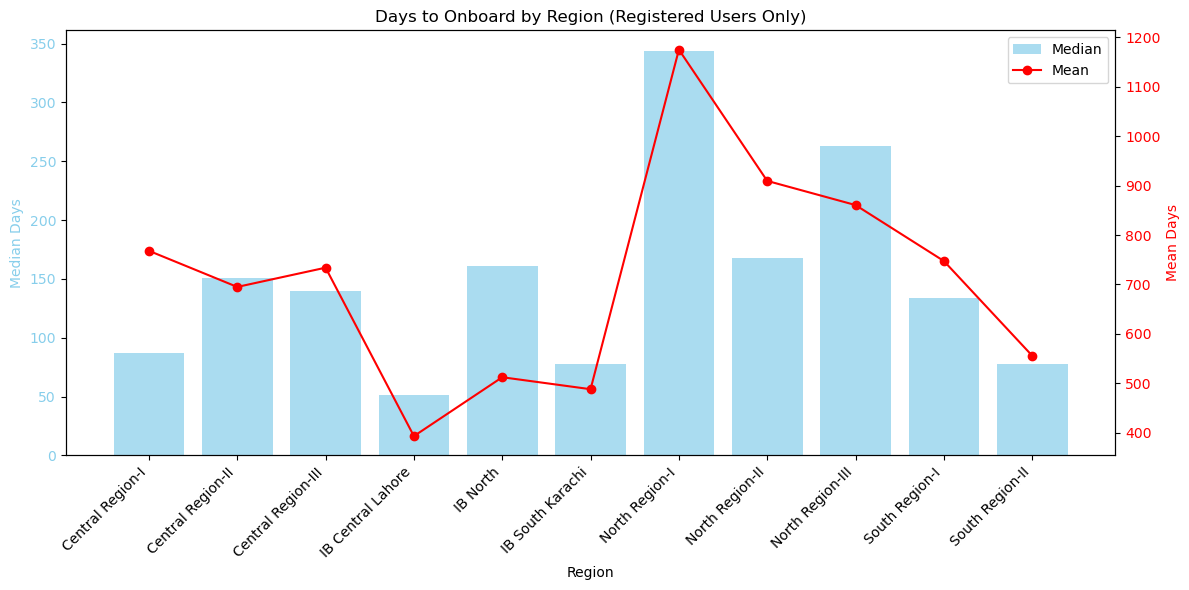

In [17]:
import matplotlib.pyplot as plt

# Filter out 'Not Registered' and 'Already Registered' statuses
filtered_df = df[~df['iNET_Registration_status'].isin(['Not Registered', 'Already Registered'])]

# Calculate median and mean days to onboard by region for filtered data
region_stats = filtered_df.groupby('REGION_DESC')['days_to_onboard'].agg(['median', 'mean']).round(2)
print("\nRegion-wise Onboarding Statistics (in days) - Excluding Not Registered and Already Registered:")
print(region_stats)

# Create figure and axis objects with a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot median as bars on primary y-axis
bars = ax1.bar(region_stats.index, region_stats['median'], color='skyblue', alpha=0.7, label='Median')
ax1.set_xlabel('Region')
ax1.set_ylabel('Median Days', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(region_stats.index, rotation=45, ha='right')

# Create secondary y-axis for mean values
ax2 = ax1.twinx()
line = ax2.plot(region_stats.index, region_stats['mean'], color='red', marker='o', label='Mean')
ax2.set_ylabel('Mean Days', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('Days to Onboard by Region (Registered Users Only)')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()



Region-wise Onboarding Statistics for 2024 (in days):
                    median   mean
REGION_DESC                      
Central Region-I      27.0  59.04
Central Region-II     40.0  88.32
Central Region-III    37.0  80.69
IB Central Lahore     29.0  65.15
IB North              35.0  75.55
IB South Karachi      45.0  90.16
North Region-I        38.0  78.17
North Region-II       39.0  77.59
North Region-III      44.0  83.56
South Region-I        39.0  78.43
South Region-II       37.0  68.99

Region-wise Onboarding Statistics for 2025 (Jan-May) (in days):
                    median   mean
REGION_DESC                      
Central Region-I       8.0  12.71
Central Region-II     14.0  20.84
Central Region-III    11.0  15.98
IB Central Lahore     13.0  17.47
IB North              13.0  18.59
IB South Karachi      10.0  16.13
North Region-I        13.0  19.17
North Region-II       14.0  19.24
North Region-III      17.0  23.06
South Region-I        12.0  15.84
South Region-II        8.0  12

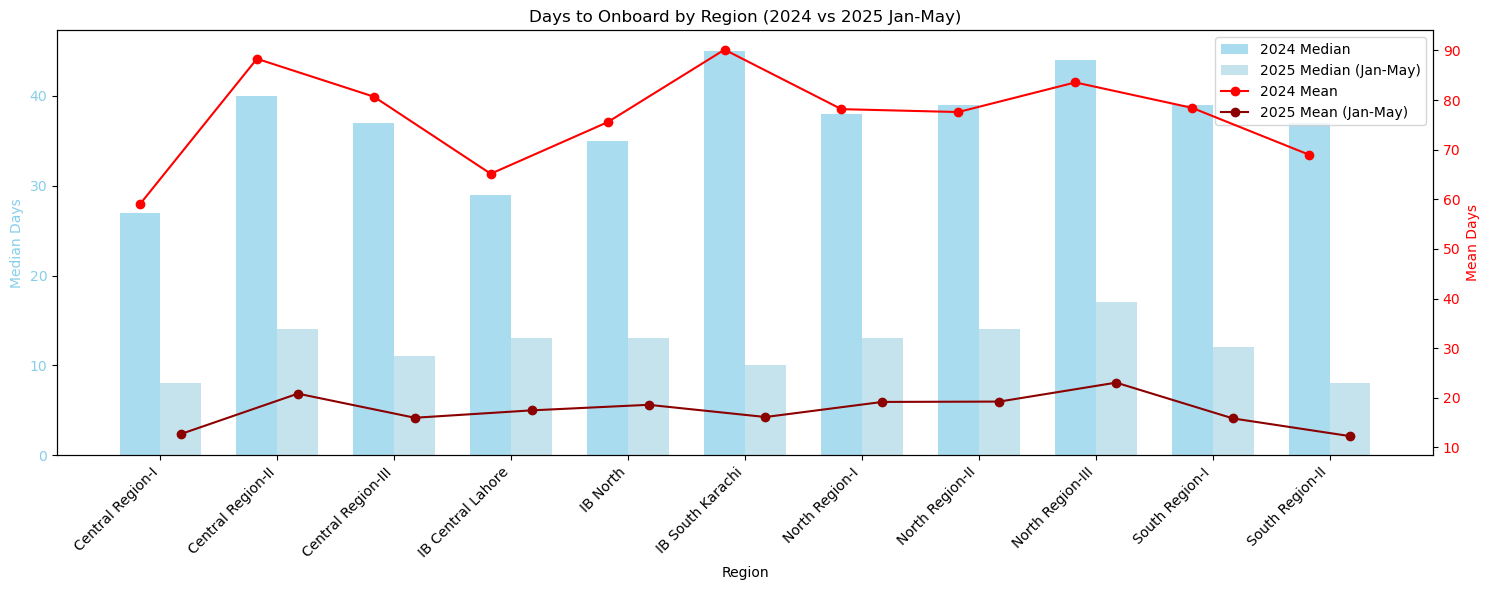


Total accounts in 2024: 238970
Total accounts in 2025 (Jan-May): 104101

Accounts by year:
AC_OPEN_DATE
2024    238970
2025    104101
Name: count, dtype: int64


In [25]:
# Filter data for 2024 and 2025 using AC_OPEN_DATE
df_2024 = df[df['AC_OPEN_DATE'].dt.year == 2024]
df_2025 = df[(df['AC_OPEN_DATE'].dt.year == 2025) & (df['AC_OPEN_DATE'].dt.month <= 5)]  # Only up to May 2025

# Filter out 'Not Registered' and 'Already Registered' statuses for both years
filtered_df_2024 = df_2024[~df_2024['iNET_Registration_status'].isin(['Not Registered', 'Already Registered'])]
filtered_df_2025 = df_2025[~df_2025['iNET_Registration_status'].isin(['Not Registered', 'Already Registered'])]

# Calculate median and mean days to onboard by region for both years
region_stats_2024 = filtered_df_2024.groupby('REGION_DESC')['days_to_onboard'].agg(['median', 'mean']).round(2)
region_stats_2025 = filtered_df_2025.groupby('REGION_DESC')['days_to_onboard'].agg(['median', 'mean']).round(2)

print("\nRegion-wise Onboarding Statistics for 2024 (in days):")
print(region_stats_2024)
print("\nRegion-wise Onboarding Statistics for 2025 (Jan-May) (in days):")
print(region_stats_2025)

# Create figure and axis objects with a single subplot
fig, ax1 = plt.subplots(figsize=(15, 6))

# Get all unique regions
regions = sorted(set(region_stats_2024.index) | set(region_stats_2025.index))
x = np.arange(len(regions))
width = 0.35

# Plot median bars for both years
bars1 = ax1.bar(x - width/2, region_stats_2024['median'], width, label='2024 Median', color='skyblue', alpha=0.7)
bars2 = ax1.bar(x + width/2, region_stats_2025['median'], width, label='2025 Median (Jan-May)', color='lightblue', alpha=0.7)

ax1.set_xlabel('Region')
ax1.set_ylabel('Median Days', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticks(x)
ax1.set_xticklabels(regions, rotation=45, ha='right')

# Create secondary y-axis for mean values
ax2 = ax1.twinx()
line1 = ax2.plot(x - width/2, region_stats_2024['mean'], color='red', marker='o', label='2024 Mean')
line2 = ax2.plot(x + width/2, region_stats_2025['mean'], color='darkred', marker='o', label='2025 Mean (Jan-May)')
ax2.set_ylabel('Mean Days', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('Days to Onboard by Region (2024 vs 2025 Jan-May)')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

# Print additional statistics
print("\nTotal accounts in 2024:", len(df_2024))
print("Total accounts in 2025 (Jan-May):", len(df_2025))
print("\nAccounts by year:")
print(pd.concat([df_2024['AC_OPEN_DATE'].dt.year.value_counts(),
                df_2025['AC_OPEN_DATE'].dt.year.value_counts()]).sort_index())



Mobile App Registration Statistics for 2024 (in days):
                              median    mean
MOBILE_APP_REGISTRATION_DATE                
1                              104.0  696.79
2                               97.0  659.91
3                               75.0  603.00
4                               91.0  606.84
5                               83.0  539.57
6                               83.0  485.04
7                               80.0  624.90
8                               65.0  587.44
9                               55.0  552.30
10                              49.0  557.99
11                              55.0  570.20
12                              79.0  603.00

Mobile App Registration Statistics for 2025 (Jan-May) (in days):
                              median    mean
MOBILE_APP_REGISTRATION_DATE                
1                               50.0  611.77
2                               39.0  562.86
3                               91.0  702.22
4                      

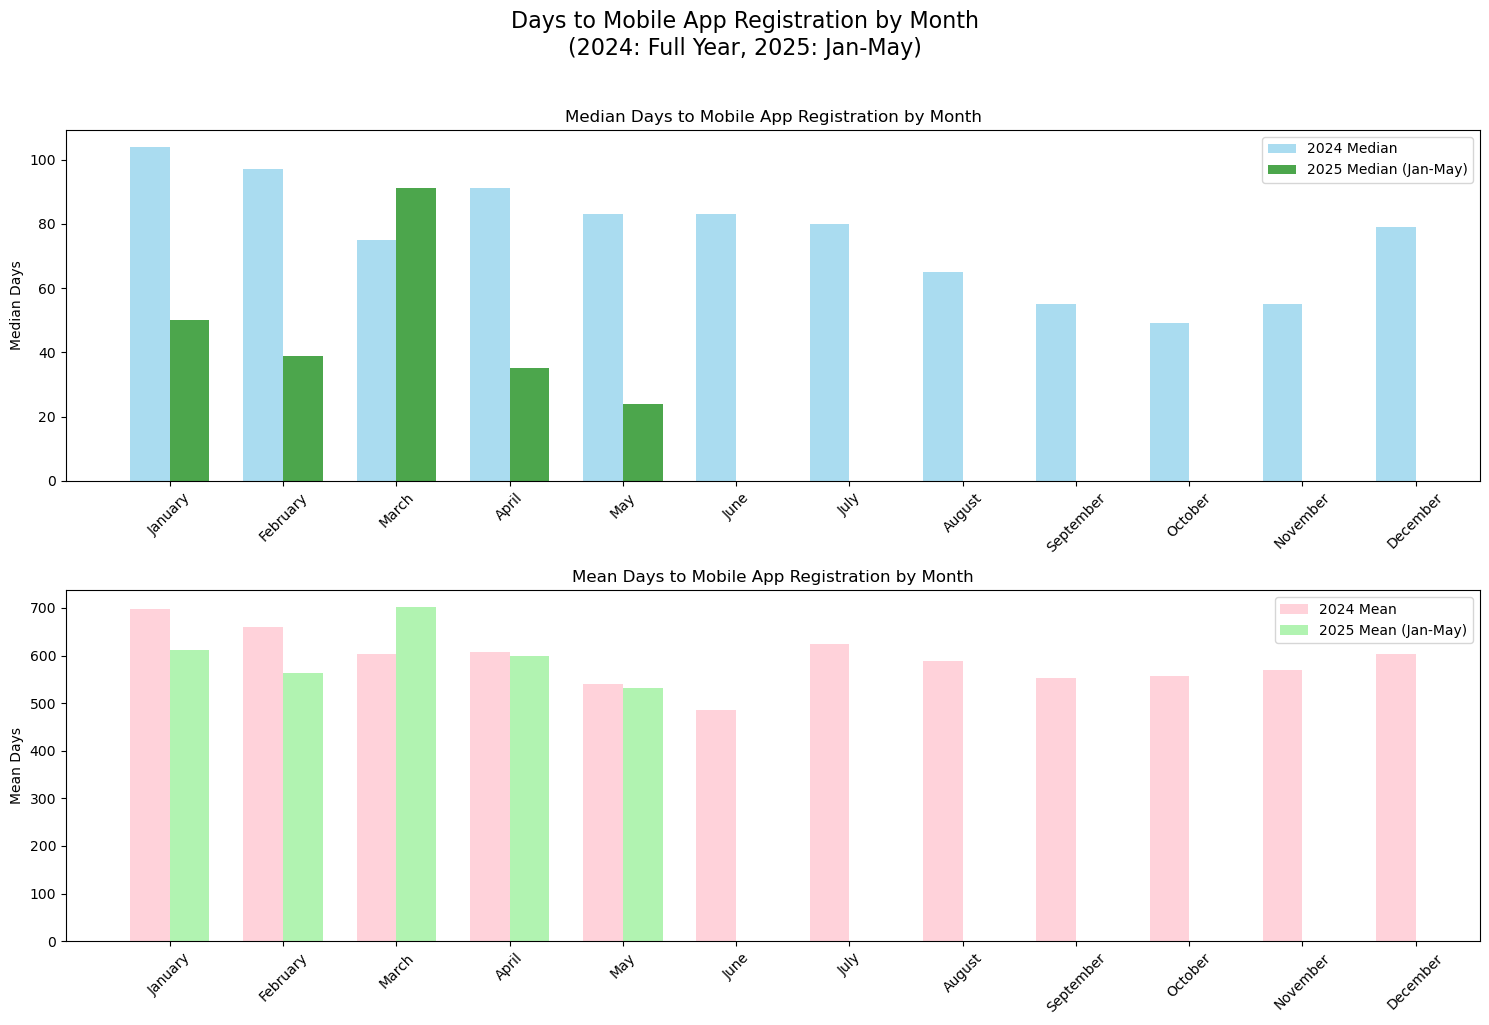


Total mobile registrations in 2024: 174055
Total mobile registrations in 2025 (Jan-May): 100026

Mobile registrations by year:
MOBILE_APP_REGISTRATION_DATE
2024    174055
2025    100026
Name: count, dtype: int64


In [32]:
# Filter data for 2024 and 2025 using MOBILE_APP_REGISTRATION_DATE
df_2024_mobile = df[df['MOBILE_APP_REGISTRATION_DATE'].dt.year == 2024]
df_2025_mobile = df[(df['MOBILE_APP_REGISTRATION_DATE'].dt.year == 2025) & 
                    (df['MOBILE_APP_REGISTRATION_DATE'].dt.month <= 5)]  # Only up to May 2025

# Calculate days to onboard (from AC_OPEN_DATE to MOBILE_APP_REGISTRATION_DATE)
df_2024_mobile['days_to_mobile_onboard'] = (df_2024_mobile['MOBILE_APP_REGISTRATION_DATE'] - 
                                           df_2024_mobile['AC_OPEN_DATE']).dt.days
df_2025_mobile['days_to_mobile_onboard'] = (df_2025_mobile['MOBILE_APP_REGISTRATION_DATE'] - 
                                           df_2025_mobile['AC_OPEN_DATE']).dt.days

# Calculate statistics by month for both years
month_stats_2024_mobile = df_2024_mobile.groupby(df_2024_mobile['MOBILE_APP_REGISTRATION_DATE'].dt.month)['days_to_mobile_onboard'].agg(['median', 'mean']).round(2)
month_stats_2025_mobile = df_2025_mobile.groupby(df_2025_mobile['MOBILE_APP_REGISTRATION_DATE'].dt.month)['days_to_mobile_onboard'].agg(['median', 'mean']).round(2)

print("\nMobile App Registration Statistics for 2024 (in days):")
print(month_stats_2024_mobile)
print("\nMobile App Registration Statistics for 2025 (Jan-May) (in days):")
print(month_stats_2025_mobile)

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle('Days to Mobile App Registration by Month\n(2024: Full Year, 2025: Jan-May)', y=1.02, fontsize=16)

# Plot median values
months = sorted(set(month_stats_2024_mobile.index) | set(month_stats_2025_mobile.index))
x = np.arange(len(months))
width = 0.35

# Plot 2024 data
ax1.bar(x - width/2, month_stats_2024_mobile['median'], width, label='2024 Median', color='skyblue', alpha=0.7)

# Plot 2025 data
available_months_2025 = month_stats_2025_mobile.index
x_2025 = np.array([months.index(m) for m in available_months_2025])
ax1.bar(x_2025 + width/2, month_stats_2025_mobile['median'], width, label='2025 Median (Jan-May)', color='green', alpha=0.7)

ax1.set_ylabel('Median Days')
ax1.set_title('Median Days to Mobile App Registration by Month')
ax1.set_xticks(x)
ax1.set_xticklabels([pd.to_datetime(f'2024-{m}-01').strftime('%B') for m in months], rotation=45)
ax1.legend()

# Plot mean values
ax2.bar(x - width/2, month_stats_2024_mobile['mean'], width, label='2024 Mean', color='pink', alpha=0.7)
ax2.bar(x_2025 + width/2, month_stats_2025_mobile['mean'], width, label='2025 Mean (Jan-May)', color='lightgreen', alpha=0.7)

ax2.set_ylabel('Mean Days')
ax2.set_title('Mean Days to Mobile App Registration by Month')
ax2.set_xticks(x)
ax2.set_xticklabels([pd.to_datetime(f'2024-{m}-01').strftime('%B') for m in months], rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()

# Print additional statistics
print("\nTotal mobile registrations in 2024:", len(df_2024_mobile))
print("Total mobile registrations in 2025 (Jan-May):", len(df_2025_mobile))
print("\nMobile registrations by year:")
print(pd.concat([df_2024_mobile['MOBILE_APP_REGISTRATION_DATE'].dt.year.value_counts(),
                df_2025_mobile['MOBILE_APP_REGISTRATION_DATE'].dt.year.value_counts()]).sort_index())


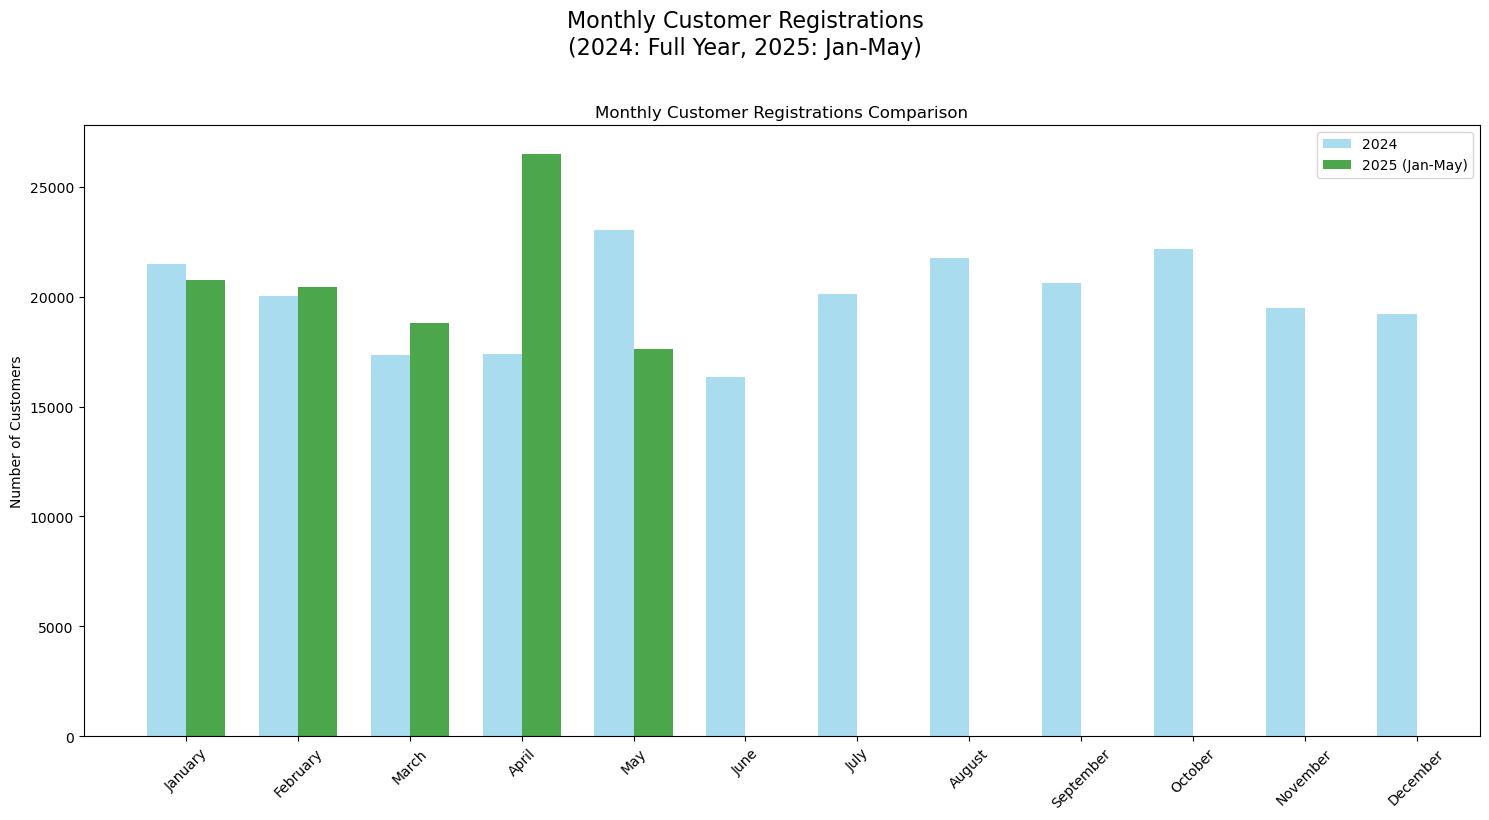


Monthly Customer Registrations in 2024:
AC_OPEN_DATE
1     21479
2     20033
3     17364
4     17375
5     23022
6     16331
7     20129
8     21776
9     20639
10    22158
11    19470
12    19194
Name: count, dtype: int64

Total customers in 2024: 238970

Monthly Customer Registrations in 2025 (Jan-May):
AC_OPEN_DATE
1    20763
2    20420
3    18819
4    26491
5    17608
Name: count, dtype: int64

Total customers in 2025 (Jan-May): 104101


In [34]:
# Calculate monthly customer registrations for both years
monthly_reg_2024 = df_2024['AC_OPEN_DATE'].dt.month.value_counts().sort_index()
monthly_reg_2025 = df_2025['AC_OPEN_DATE'].dt.month.value_counts().sort_index()

# Create visualization
fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle('Monthly Customer Registrations\n(2024: Full Year, 2025: Jan-May)', y=1.02, fontsize=16)

# Plot data side by side
months = range(1, 13)
x = np.arange(len(months))
width = 0.35

# Plot 2024 data
ax.bar(x - width/2, monthly_reg_2024, width, label='2024', color='skyblue', alpha=0.7)

# Plot 2025 data (Jan-May)
available_months_2025 = monthly_reg_2025.index
x_2025 = np.array([months.index(m) for m in available_months_2025])
ax.bar(x_2025 + width/2, monthly_reg_2025, width, label='2025 (Jan-May)', color='green', alpha=0.7)

ax.set_ylabel('Number of Customers')
ax.set_title('Monthly Customer Registrations Comparison')
ax.set_xticks(x)
ax.set_xticklabels([pd.to_datetime(f'2024-{m}-01').strftime('%B') for m in months], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nMonthly Customer Registrations in 2024:")
print(monthly_reg_2024)
print("\nTotal customers in 2024:", monthly_reg_2024.sum())
print("\nMonthly Customer Registrations in 2025 (Jan-May):")
print(monthly_reg_2025)
print("\nTotal customers in 2025 (Jan-May):", monthly_reg_2025.sum())



Month-wise Onboarding Statistics for 2024 (in days):
       median    mean
month                
1        78.0  131.61
2        78.0  125.17
3        63.0  109.56
4        50.0   98.15
5        39.0   85.79
6        35.0   73.70
7        32.0   66.52
8        31.0   61.41
9        31.0   54.61
10       29.0   47.61
11       22.0   36.45
12       18.0   30.46

Month-wise Onboarding Statistics for 2025 (Jan-May) (in days):
       median   mean
month               
1        15.0  23.77
2        15.0  20.44
3        13.0  16.46
4         9.0  10.99
5         4.0   4.69


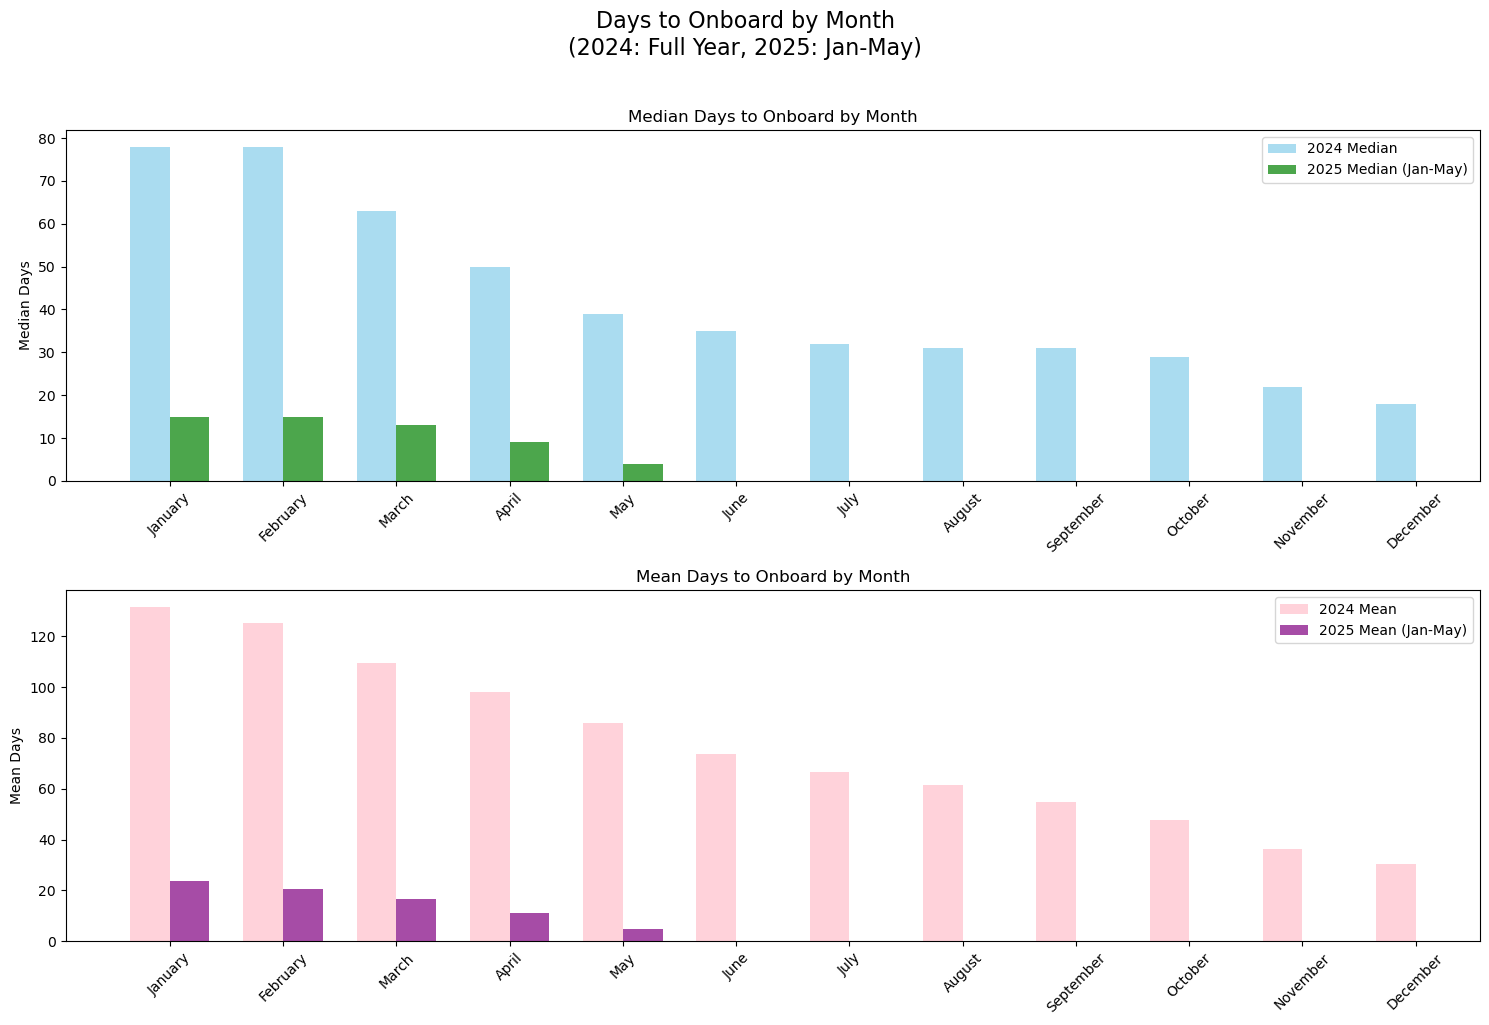

In [31]:
# Filter data for 2024 and 2025 using AC_OPEN_DATE
df_2024 = df[df['AC_OPEN_DATE'].dt.year == 2024]
df_2025 = df[(df['AC_OPEN_DATE'].dt.year == 2025) & (df['AC_OPEN_DATE'].dt.month <= 5)]  # Only up to May 2025

# Filter out 'Not Registered' and 'Already Registered' statuses for both years
filtered_df_2024 = df_2024[~df_2024['iNET_Registration_status'].isin(['Not Registered', 'Already Registered'])]
filtered_df_2025 = df_2025[~df_2025['iNET_Registration_status'].isin(['Not Registered', 'Already Registered'])]

# Add month column for grouping
filtered_df_2024['month'] = filtered_df_2024['AC_OPEN_DATE'].dt.month
filtered_df_2025['month'] = filtered_df_2025['AC_OPEN_DATE'].dt.month

# Calculate median and mean days to onboard by month for both years
month_stats_2024 = filtered_df_2024.groupby('month')['days_to_onboard'].agg(['median', 'mean']).round(2)
month_stats_2025 = filtered_df_2025.groupby('month')['days_to_onboard'].agg(['median', 'mean']).round(2)

print("\nMonth-wise Onboarding Statistics for 2024 (in days):")
print(month_stats_2024)
print("\nMonth-wise Onboarding Statistics for 2025 (Jan-May) (in days):")
print(month_stats_2025)

# Create figure with subplots for median and mean
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle('Days to Onboard by Month\n(2024: Full Year, 2025: Jan-May)', y=1.02, fontsize=16)

# Plot median values
months = sorted(set(month_stats_2024.index) | set(month_stats_2025.index))
x = np.arange(len(months))
width = 0.35

# Plot 2024 data for all months
ax1.bar(x - width/2, month_stats_2024['median'], width, label='2024 Median', color='skyblue', alpha=0.7)

# Plot 2025 data only for available months
available_months_2025 = month_stats_2025.index
x_2025 = np.array([months.index(m) for m in available_months_2025])
ax1.bar(x_2025 + width/2, month_stats_2025['median'], width, label='2025 Median (Jan-May)', color='green', alpha=0.7)

ax1.set_ylabel('Median Days')
ax1.set_title('Median Days to Onboard by Month')
ax1.set_xticks(x)
ax1.set_xticklabels([pd.to_datetime(f'2024-{m}-01').strftime('%B') for m in months], rotation=45)
ax1.legend()

# Plot mean values
ax2.bar(x - width/2, month_stats_2024['mean'], width, label='2024 Mean', color='pink', alpha=0.7)
ax2.bar(x_2025 + width/2, month_stats_2025['mean'], width, label='2025 Mean (Jan-May)', color='purple', alpha=0.7)
ax2.set_ylabel('Mean Days')
ax2.set_title('Mean Days to Onboard by Month')
ax2.set_xticks(x)
ax2.set_xticklabels([pd.to_datetime(f'2024-{m}-01').strftime('%B') for m in months], rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()


Distribution of Active Users:
Active_users
Unknown            823158
Weekly Active      257558
Biweekly Active     68392
Monthly Active      62686
3 Months Active     44711
6 Months Active     26357
1 Year Active        4122
Name: count, dtype: int64


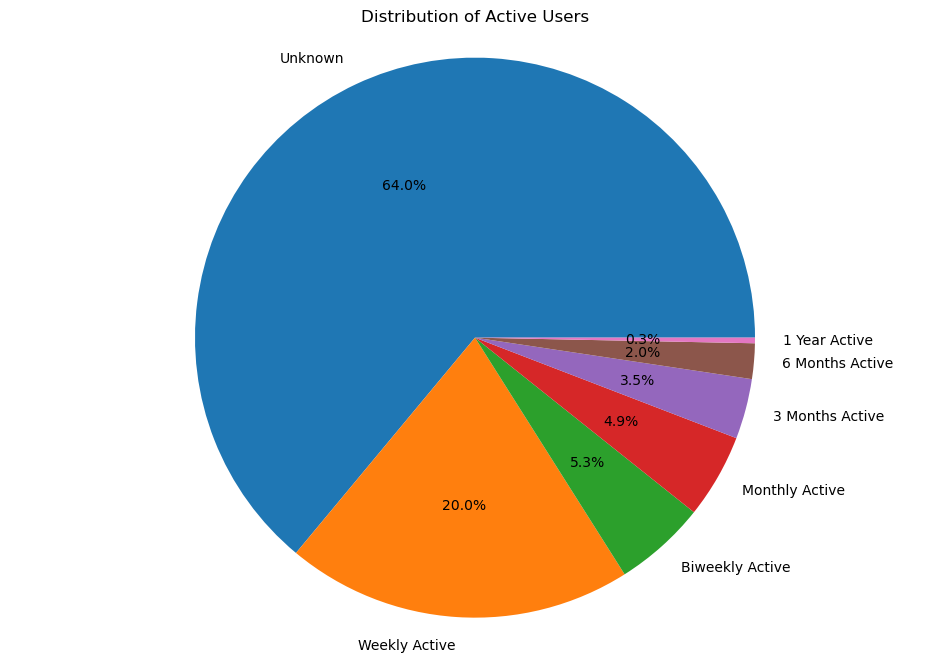

In [35]:
# Create a copy of the dataframe to avoid modifying the original
df_active = df.copy()

# Filter out customers not registered on iNET
df_active = df_active[df_active['INET_ELIGIBLE'] == 'Y']

# Convert LAST_TRX_DATE to datetime if not already
df_active['LAST_TRX_DATE'] = pd.to_datetime(df_active['LAST_TRX_DATE'])

# Get current date
current_date = pd.Timestamp.now()

# Calculate days since last transaction
df_active['days_since_last_trx'] = (current_date - df_active['LAST_TRX_DATE']).dt.days

# Create Active_users column based on days since last transaction
conditions = [
    (df_active['days_since_last_trx'] <= 7),
    (df_active['days_since_last_trx'] <= 14),
    (df_active['days_since_last_trx'] <= 30),
    (df_active['days_since_last_trx'] <= 90),
    (df_active['days_since_last_trx'] <= 180),
    (df_active['days_since_last_trx'] <= 365),
    (df_active['days_since_last_trx'] > 365)
]

choices = [
    'Weekly Active',
    'Biweekly Active',
    'Monthly Active',
    '3 Months Active',
    '6 Months Active',
    '1 Year Active',
    'More than 1 Year'
]

df_active['Active_users'] = np.select(conditions, choices, default='Unknown')

# Display the distribution of active users
active_users_distribution = df_active['Active_users'].value_counts()
print("\nDistribution of Active Users:")
print(active_users_distribution)

# Create a pie chart to visualize the distribution
plt.figure(figsize=(12, 8))
plt.pie(active_users_distribution, labels=active_users_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Active Users')
plt.axis('equal')
plt.show()
